In [1]:
import pandas as pd
import numpy as np

import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import metrics

from scipy.special import expit
from scipy.special import logit

plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [87]:
df = pd.read_csv('output.csv', header=0, sep=',', index_col=0)
cols_to_replace = ['Fatalities', 'Injured']
df[cols_to_replace] = df[cols_to_replace].replace('Unknown', '0')
df[cols_to_replace] = df[cols_to_replace].astype(str).astype(int)
df.head()

,Date,Country,City,Perpetrator,Fatalities,Injured,Target
0,2019-12-31,China,Hong Kong,Unknown,0,0,Government (General)
1,2019-12-31,India,Bagiot Dora,Unknown,0,1,Private Citizens & Property
2,2019-12-31,Sudan,El Geneina,Unknown,2,0,"Government (General),Police"
3,2019-12-31,Sudan,El Geneina,Unknown,2,1,Police
4,2019-12-31,Iraq,Baghdad,Unknown,0,0,Private Citizens & Property


In [88]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
df['Date'].head(5)

0   2019-12-31
1   2019-12-31
2   2019-12-31
3   2019-12-31
4   2019-12-31
Name: Date, dtype: datetime64[ns]

In [89]:
df_country_event_count = df['Country'].value_counts()
df_country_event_count.head(20)


Iraq                                9171
Afghanistan                         7386
India                               3906
Yemen                               2999
Pakistan                            2900
Philippines                         2711
Nigeria                             2384
Somalia                             2289
Syria                               1439
Turkey                              1249
Libya                               1052
Thailand                             943
Egypt                                864
Democratic Republic of the Congo     804
Colombia                             703
West Bank and Gaza Strip             641
Nepal                                634
Cameroon                             599
Mali                                 580
United Kingdom                       460
Name: Country, dtype: int64

<AxesSubplot:>

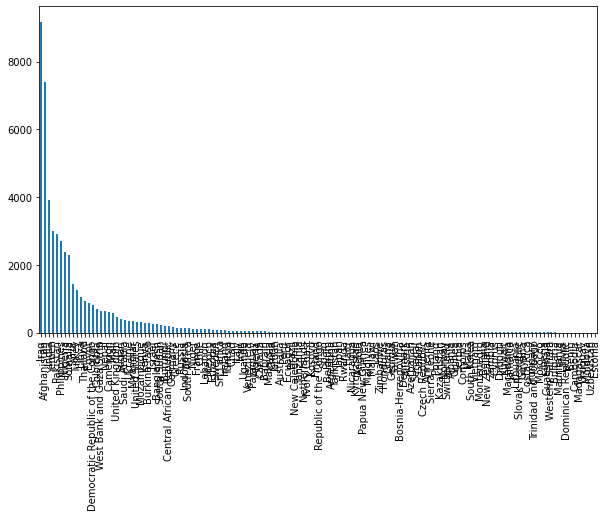

In [112]:
# df_country_event_count.plot()
df['Country'].value_counts().plot(kind='bar', y='Country')

In [114]:
df['City'].value_counts().plot(kind='bar', y='City')

<AxesSubplot:>

Error in callback <function flush_figures at 0x000002B50D14FEE0> (for post_execute):


KeyboardInterrupt: 

In [101]:
df_country_Injured = df.groupby(['Country'])['Injured'].sum().reset_index(name ='Total_Injured')
df_country_Injured = df_country_Injured.sort_values(by =['Total_Injured'], ascending=False)


df_country_Injured.head(20)

,Country,Total_Injured
0,Afghanistan,31477
55,Iraq,28467
119,Syria,8417
96,Pakistan,6648
137,Yemen,6306
94,Nigeria,5154
110,Somalia,4735
126,Turkey,4403
52,India,2866
100,Philippines,2758


Text(0.5, 1.0, 'Injured per country')

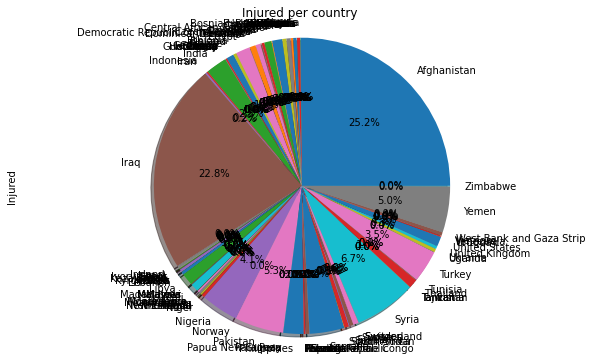

In [110]:
# df_country_Injured.Total_Injured.plot(kind='pie', y='Country')
df.groupby(['Country'])['Injured'].sum().plot(kind='pie', y='Country', shadow = True, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Injured per country")

Text(0.5, 1.0, 'Fatalities per country')

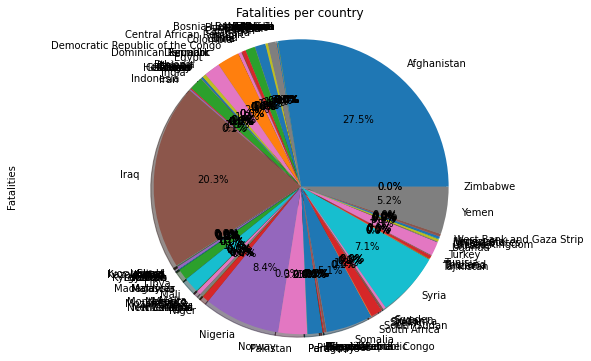

In [111]:
df.groupby(['Country'])['Fatalities'].sum().plot(kind='pie', y='Country', shadow = True, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Fatalities per country")

In [92]:
df_country_fatality = df.groupby(['Country'])['Fatalities'].sum().reset_index(name ='Total Fatalities')
df_country_fatality = df_country_fatality.sort_values(by =['Total Fatalities'], ascending=False)
df_country_fatality.head(20)

,Country,Total Fatalities
0,Afghanistan,33347
55,Iraq,24639
94,Nigeria,10123
119,Syria,8569
137,Yemen,6293
110,Somalia,6177
96,Pakistan,3822
31,Democratic Republic of the Congo,2953
36,Egypt,2133
79,Mali,2054


In [115]:
# df_country_fatality.plot.scatter(x='Country',y='Total Fatalities', s=30)
df.groupby(['Country'])['Fatalities'].sum().plot.scatter(y='Date')


TypeError: scatter() missing 1 required positional argument: 'x'

In [52]:
country_fatality_sum = df.groupby('Country')['Fatalities'].sum().reset_index().sort_values(by='Fatalities', ascending=False)
# country_fatality_sum = country_fatality_sum.sort_values(by='Fatalities',ascending=False)
country_fatality_sum.head(10)
# city_fataluty_sum = df.groupby('Country')['Injured'].sum()

,Country,Fatalities
0,Afghanistan,33347
55,Iraq,24639
94,Nigeria,10123
119,Syria,8569
137,Yemen,6293
110,Somalia,6177
96,Pakistan,3822
31,Democratic Republic of the Congo,2953
36,Egypt,2133
79,Mali,2054


In [120]:
# df_record_per_year = df.groupby(df.Date.dt.to_period("Y"))['Date'].sum()
for year, records in df.groupby(df.Date.dt.to_period("Y"))['Date'].sum().item():
    print(f"TotalRecords{year} = {records}")

TypeError: datetime64 type does not support add operations

<AxesSubplot:ylabel='Perpetrator'>

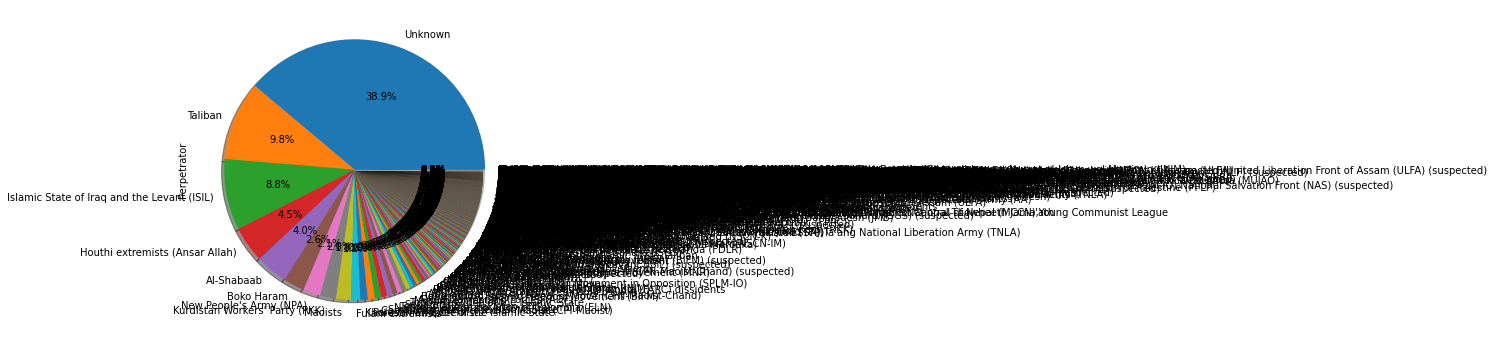

In [118]:
df['Perpetrator'].value_counts().plot(kind='pie', y='Perpetrator', shadow = True, autopct='%1.1f%%')